In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import missingno as msno
from functions import *
from sklearn import decomposition
from sklearn import preprocessing
import statsmodels.formula.api as smf
import statsmodels.api as sm
sns.set_theme(style="whitegrid")

In [2]:
france_produit=pd.read_csv('france_produit.csv')
#france_produit=france_produit.drop(columns='Unnamed: 0')
france_produit.head(5)

,code,countries_fr,serving_size,nutrition_grade_fr,additives_n,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,cholesterol_100g,trans-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
0,36252,"France,États-Unis",40 g (0.25 cup),e,1.0,Sugary snacks,1967.89000,20.00,12.5,0.0,0.0,0.012,0.0,70.00,57.5,2.5,2.50,0.09652
1,39529,"France,États-Unis",48 g (0.25 cup),a,3.0,Sugary snacks,1552.74895,4.17,0.0,0.0,0.0,0.000,0.0,77.08,0.0,6.2,6.25,0.00000
2,10187319,France,NaN,d,2.0,Beverages,1508.99480,0.80,0.8,0.0,0.0,0.000,0.0,87.70,87.7,0.9,0.60,0.01000
3,10207260,France,NaN,d,3.0,Sugary snacks,1110.81110,2.90,2.9,0.0,0.0,0.000,0.0,50.30,50.3,3.9,9.50,0.00300
4,40608754,France,150ml,e,2.0,Beverages,177.00000,0.00,0.0,0.0,0.0,0.000,0.0,10.40,10.4,0.0,0.00,0.02540


Text(0.5, 1.0, "distribution de l'énergie")

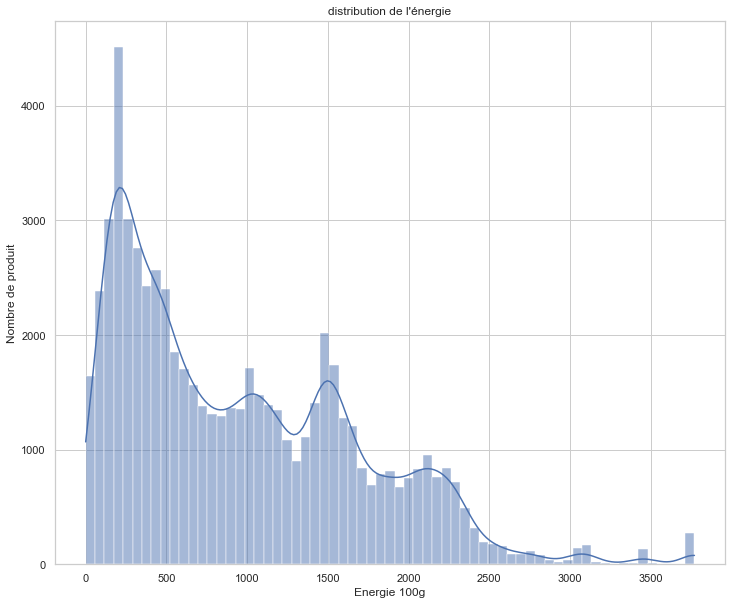

In [3]:
sns.histplot(data=france_produit, x="energy_100g", kde=True)
plt.gcf().set_size_inches(12, 10)
plt.xlabel('Energie 100g')
plt.ylabel('Nombre de produit')
plt.title("distribution de l'énergie")

Text(0.5, 1.0, "distribution de l'énergie par catégorie")

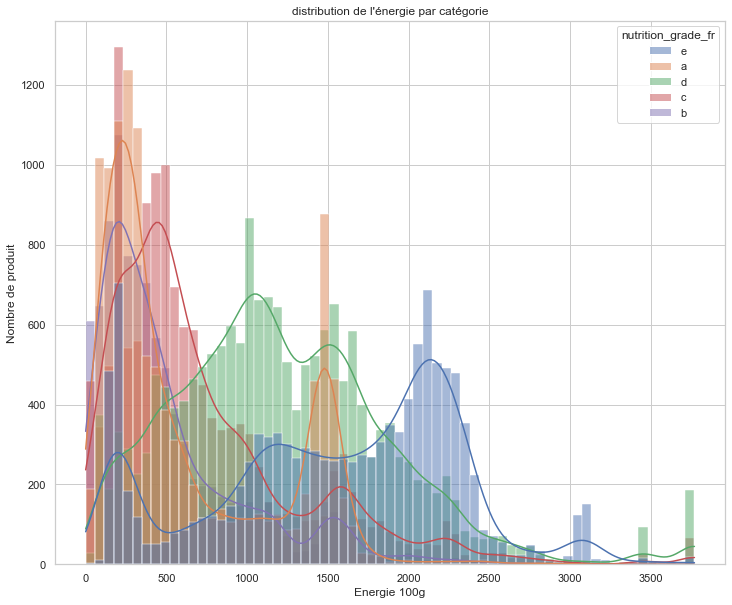

In [4]:
sns.histplot(data=france_produit[france_produit["energy_100g"]>0], x="energy_100g", kde=True,hue="nutrition_grade_fr")
plt.gcf().set_size_inches(12, 10)
plt.xlabel('Energie 100g')
plt.ylabel('Nombre de produit')
plt.title("distribution de l'énergie par catégorie")

Text(0.5, 1.0, 'Distribution des produit par catégorie')

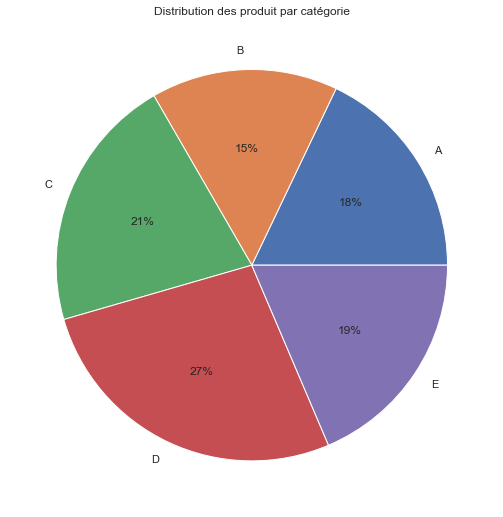

In [5]:
data_category=france_produit.groupby(['nutrition_grade_fr']).size()
data_category
plt.pie(data_category,labels=['A','B','C','D','E'],autopct="%.0f%%")
plt.gcf().set_size_inches(9, 9)
plt.title("Distribution des produit par catégorie")

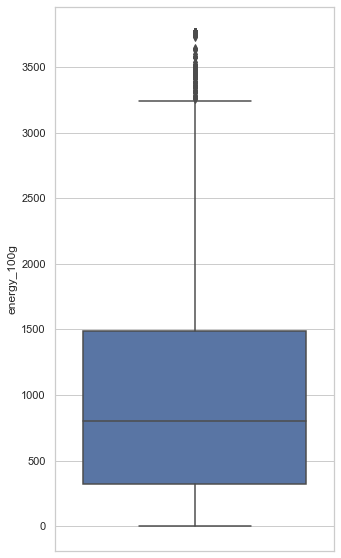

In [6]:
ax = sns.boxplot(y="energy_100g",data=france_produit,order=["a","b","c","d","e"])
plt.gcf().set_size_inches(5, 10)

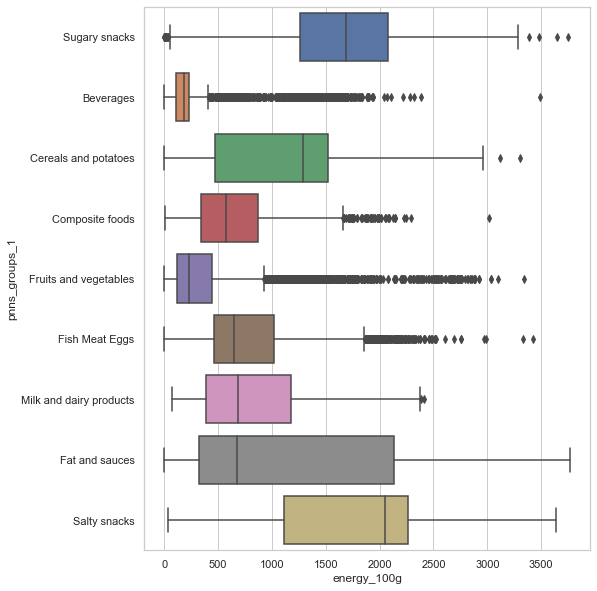

In [7]:
ax = sns.boxplot(x="energy_100g",y="pnns_groups_1",data=france_produit)
plt.gcf().set_size_inches(8, 10)

Text(0.5, 1.0, "Distribution des produit par rapport à l'énergie et le gras")

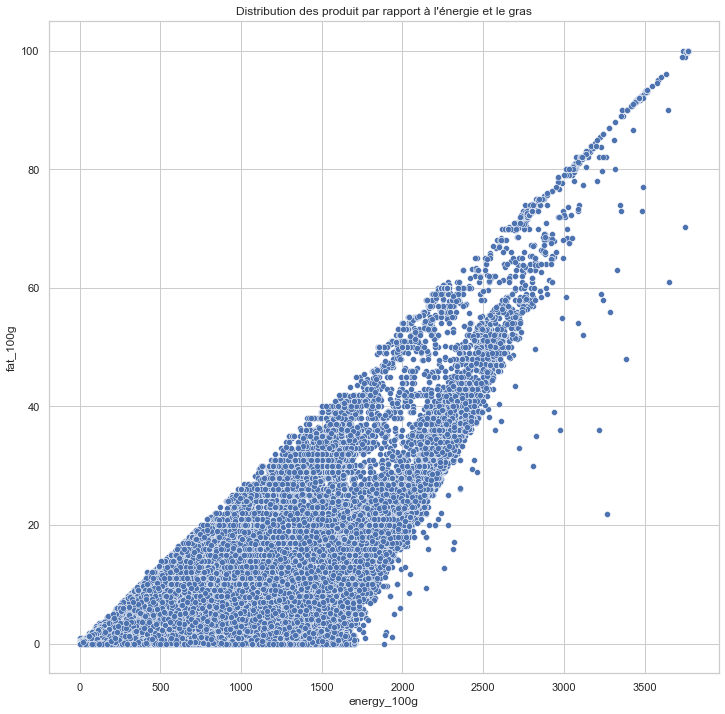

In [8]:
sns.scatterplot(data=france_produit,x="energy_100g",y="fat_100g")
plt.gcf().set_size_inches(12, 12)
plt.title("Distribution des produit par rapport à l'énergie et le gras")

Text(0.5, 1.0, "Distribution des produit par rapport à l'énergie et le gras par nutriscore")

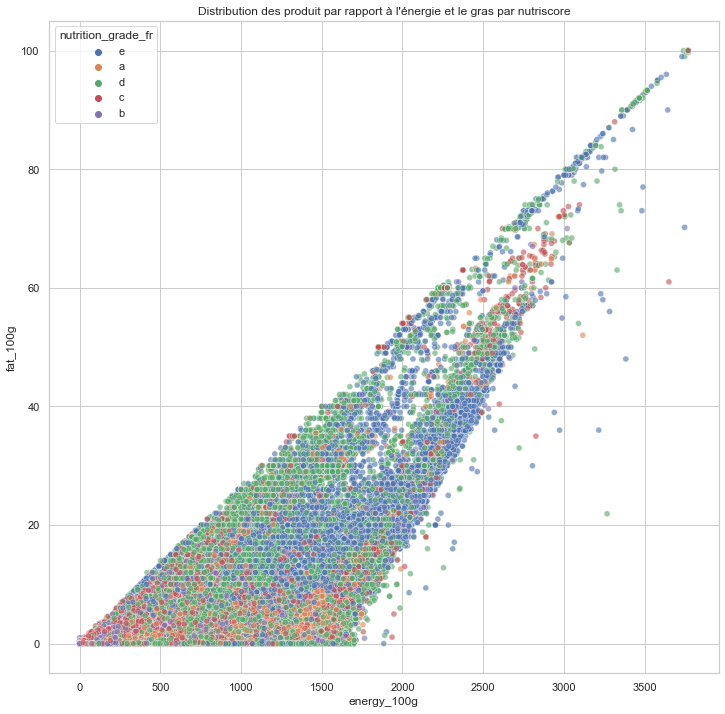

In [9]:
sns.scatterplot(data=france_produit,x="energy_100g",y="fat_100g",hue="nutrition_grade_fr",alpha=0.6)
plt.gcf().set_size_inches(12, 12)
plt.title("Distribution des produit par rapport à l'énergie et le gras par nutriscore")

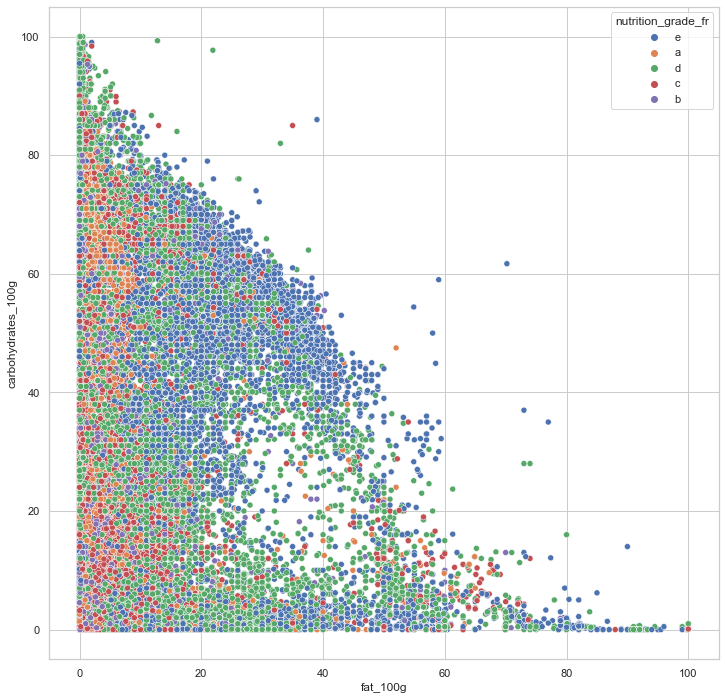

In [10]:
sns.scatterplot(data=france_produit,x="fat_100g",y="carbohydrates_100g",hue="nutrition_grade_fr")
plt.gcf().set_size_inches(12, 12)

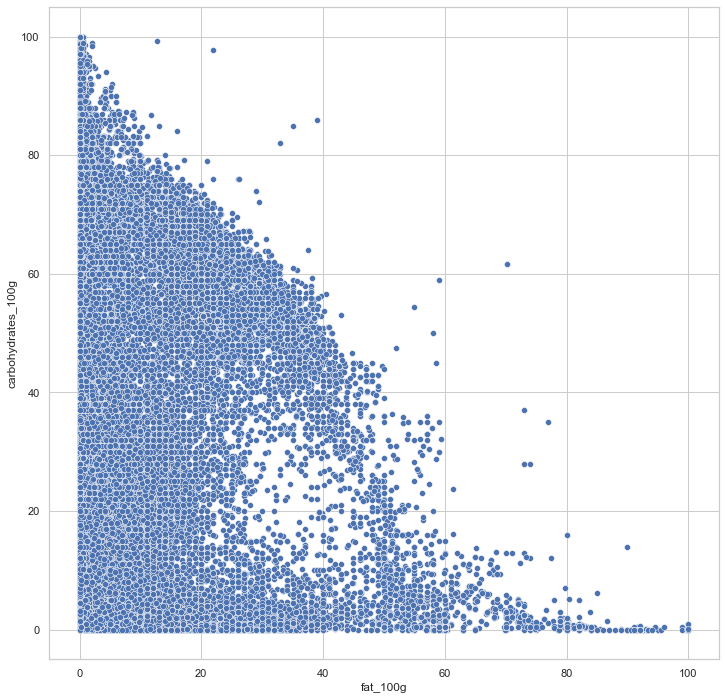

In [11]:
sns.scatterplot(data=france_produit,x="fat_100g",y="carbohydrates_100g")
plt.gcf().set_size_inches(12, 12)

In [12]:
cont = france_produit[["pnns_groups_1","nutrition_grade_fr"]].pivot_table(index="pnns_groups_1",
                                                                columns='nutrition_grade_fr',aggfunc=len,margins=True,margins_name="Total")


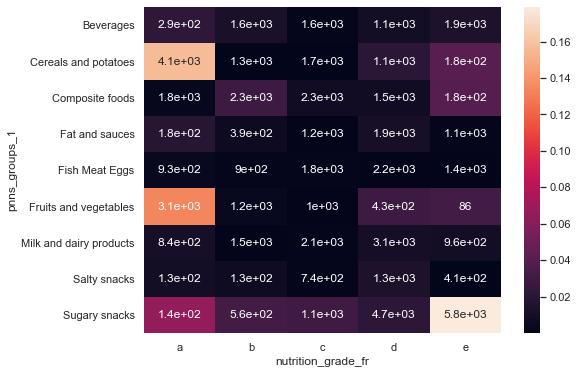

In [13]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(france_produit)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])

plt.gcf().set_size_inches(8, 6)
plt.show()

Realisation d'une ACP

In [14]:
n_comp=13

In [15]:
data_acp=france_produit[['additives_n','energy_100g','fat_100g','saturated-fat_100g','monounsaturated-fat_100g',
                         'polyunsaturated-fat_100g','cholesterol_100g','trans-fat_100g','carbohydrates_100g',
                         'sugars_100g','fiber_100g','proteins_100g','salt_100g']]

In [16]:
X=data_acp.values
X

array([[1.00000000e+00, 1.96789000e+03, 2.00000000e+01, ...,
        2.50000000e+00, 2.50000000e+00, 9.65200000e-02],
       [3.00000000e+00, 1.55274895e+03, 4.17000000e+00, ...,
        6.20000000e+00, 6.25000000e+00, 0.00000000e+00],
       [2.00000000e+00, 1.50899480e+03, 8.00000000e-01, ...,
        9.00000000e-01, 6.00000000e-01, 1.00000000e-02],
       ...,
       [1.00000000e+00, 1.57598680e+03, 2.80000000e+00, ...,
        5.90000000e+00, 1.30000000e+01, 6.80000000e-01],
       [1.00000000e+00, 5.61099870e+02, 3.73000000e+00, ...,
        1.22000000e+01, 2.12200000e+01, 1.00000000e-01],
       [0.00000000e+00, 2.10000000e+01, 2.00000000e-01, ...,
        2.00000000e-01, 5.00000000e-01, 2.54000000e-02]])

In [17]:
code=france_produit['code']
nutri = [france_produit.loc[L_id, "nutrition_grade_fr"] for L_id in france_produit.index]
features=data_acp.columns
features

Index(['additives_n', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
       'cholesterol_100g', 'trans-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g'],
      dtype='object')

In [18]:
X_scaled=preprocessing.StandardScaler().fit_transform(X)

In [19]:
acp=decomposition.PCA(n_components=n_comp)

In [20]:
acp.fit(X_scaled)

PCA(n_components=13)

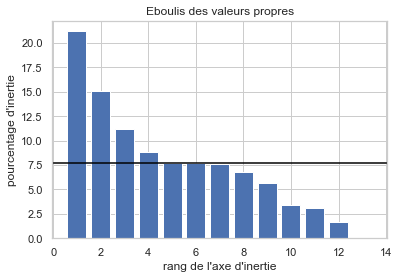

In [21]:
display_kaiser_plot(acp)

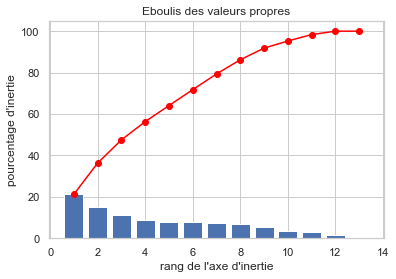

In [22]:
display_scree_plot(acp)

In [23]:
pcs=acp.components_

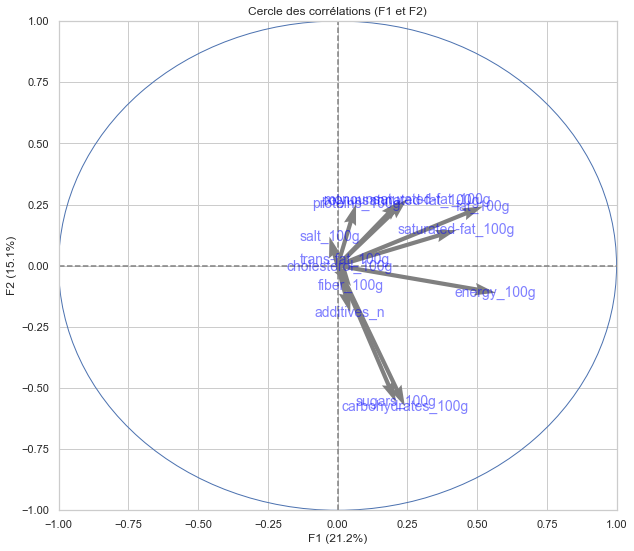

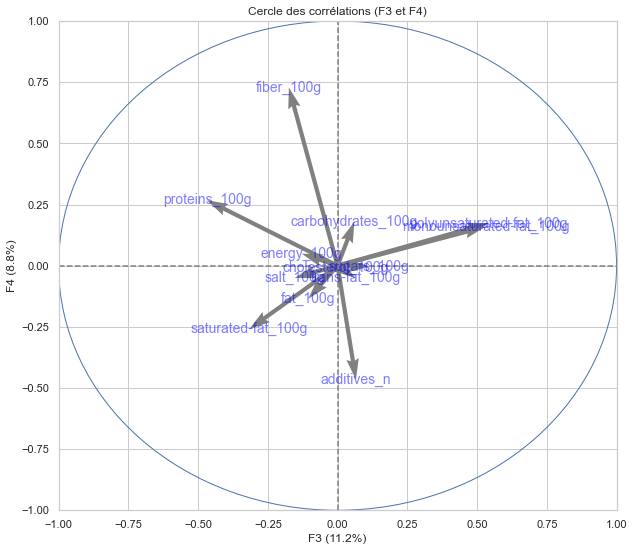

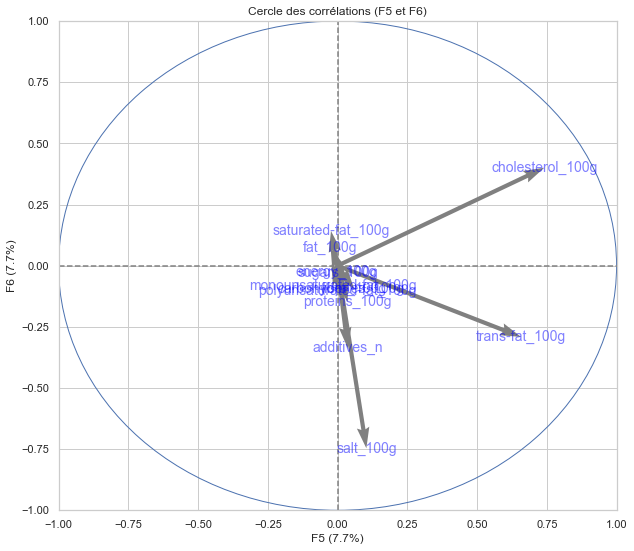

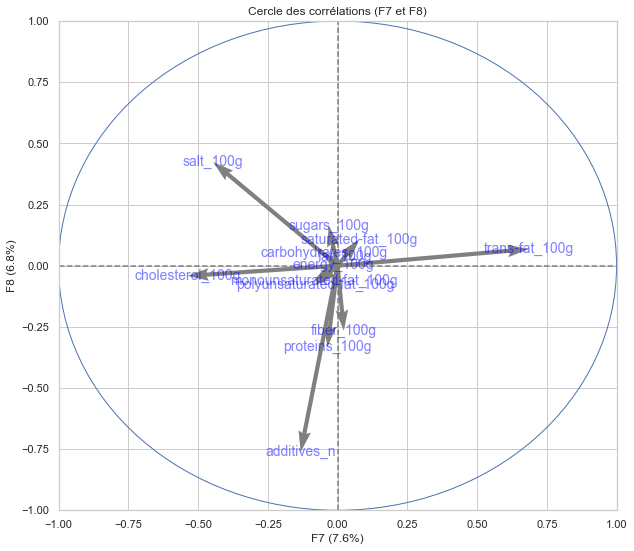

In [24]:
display_circles(pcs,n_comp,acp,[(0,1),(2,3),(4,5),(6,7)],labels=np.array(features))

F1 = 

In [25]:
X_projected=acp.transform(X_scaled)
X_projected


array([[ 2.26775868e+00, -2.36810721e+00,  6.15262827e-02, ...,
        -4.84005113e-01, -8.56478497e-02,  8.90787784e-03],
       [ 3.20590511e-01, -1.35841579e+00,  6.18331481e-02, ...,
         1.48202106e+00,  8.18913946e-01,  1.69467706e-02],
       [ 1.15122607e+00, -4.20020592e+00,  1.15808569e+00, ...,
        -1.11890596e+00, -4.93709378e-01,  1.27969535e-02],
       ...,
       [ 3.37953521e-01, -9.83770185e-01, -4.19789309e-01, ...,
         1.15041725e+00,  8.14022151e-01,  1.48366951e-02],
       [-7.31975450e-01,  8.58439439e-01, -1.26992567e+00, ...,
        -7.16177757e-01, -6.15115820e-02,  3.93696491e-04],
       [-1.85440124e+00,  6.70918567e-01,  6.92140854e-01, ...,
         5.15680183e-02,  8.99430961e-03,  7.99122021e-03]])

In [26]:
df = pd.DataFrame(data=X_projected)
df=df[[0,1,2,3,4,5]]
df['nutri']=nutri

In [27]:
df=df.rename(columns={0: "F1", 1: "F2", 2: "F3",3:"F4",4:"F5",5:"F6"})

In [28]:
df.describe()

,F1,F2,F3,F4,F5,F6
count,6.447800e+04,6.447800e+04,6.447800e+04,6.447800e+04,6.447800e+04,6.447800e+04
mean,-1.819803e-16,2.651205e-16,-1.583959e-16,5.662606e-17,1.901411e-17,1.776446e-17
std,1.660821e+00,1.401005e+00,1.205614e+00,1.071143e+00,1.003444e+00,9.998332e-01
min,-2.619030e+00,-6.305888e+00,-1.199003e+01,-1.257285e+01,-6.927320e-01,-6.434787e+01
25%,-1.294216e+00,-7.506433e-01,-4.821418e-01,-5.024331e-01,-7.121065e-02,-1.880176e-01
50%,-3.712326e-01,1.912647e-01,5.961609e-02,-9.058140e-02,-3.114747e-02,1.151832e-01
75%,8.657094e-01,7.334014e-01,5.590713e-01,3.427196e-01,2.452156e-02,3.646239e-01
max,1.295069e+01,1.132929e+01,1.822520e+01,2.141711e+01,1.874771e+02,1.019367e+02


Text(0.5, 1.0, 'Projection des individus (sur F2 et F4)')

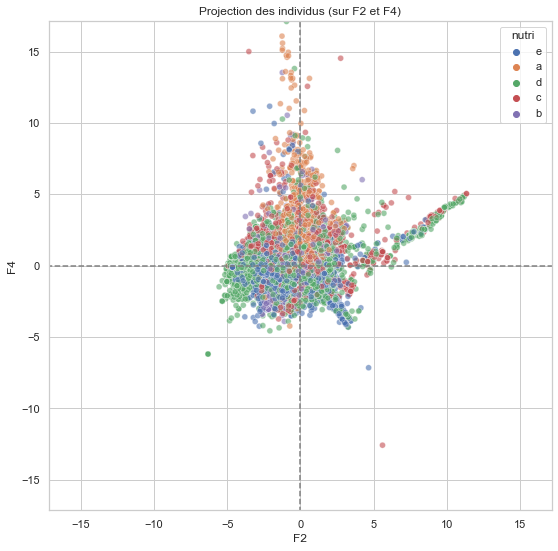

In [29]:
sns.scatterplot(data=df,x="F2",y="F4",hue="nutri",alpha=0.6)
plt.gcf().set_size_inches(9, 9)
plt.plot([-100, 100], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-100, 100], color='grey', ls='--')
boundary = np.max(np.abs(df["F4"])) * 0.8
plt.xlim([-boundary,boundary])
plt.ylim([-boundary,boundary])
plt.title("Projection des individus (sur F2 et F4)")

Text(0.5, 1.0, 'Projection des individus (sur F5 et F3)')

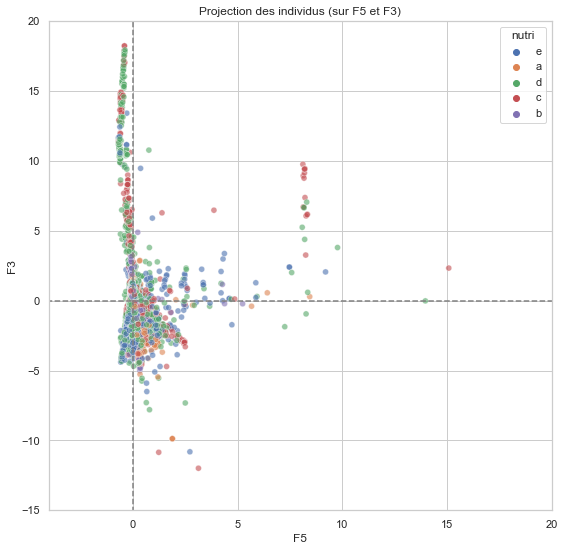

In [30]:
sns.scatterplot(data=df,x="F5",y="F3",hue="nutri",alpha=0.6)
plt.gcf().set_size_inches(9, 9)
plt.plot([-100, 100], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-100, 100], color='grey', ls='--')
boundary=20
#boundary = np.max(np.abs(df["F5"])) * 0.8
plt.xlim([-4,boundary])
plt.ylim([-15,boundary])
plt.title("Projection des individus (sur F5 et F3)")

Text(0.5, 1.0, 'Projection des individus (sur F1 et F2)')

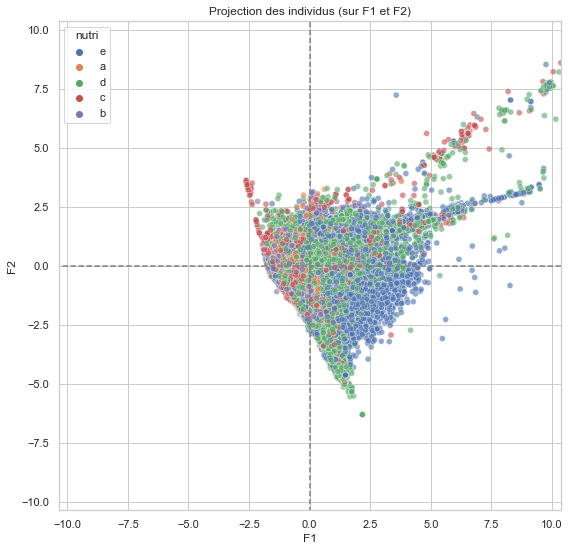

In [31]:
sns.scatterplot(data=df,x="F1",y="F2",hue="nutri",alpha=0.6)
plt.gcf().set_size_inches(9, 9)
plt.plot([-100, 100], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-100, 100], color='grey', ls='--')
boundary = np.max(np.abs(df["F1"])) * 0.8
plt.xlim([-boundary,boundary])
plt.ylim([-boundary,boundary])
plt.title("Projection des individus (sur F1 et F2)")

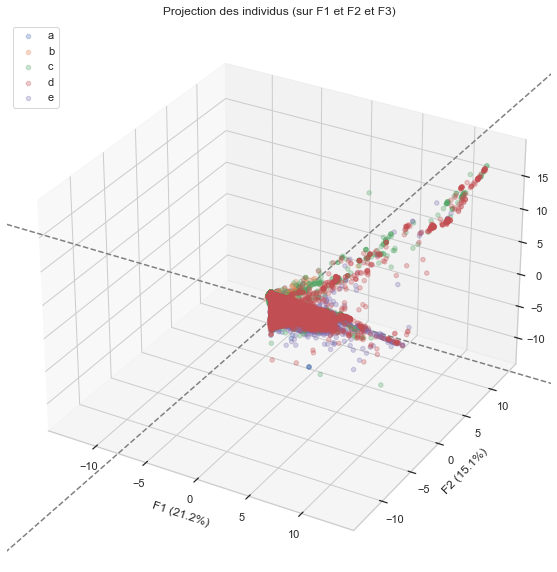

<Figure size 576x432 with 0 Axes>

In [32]:
#display_factorial_planes(X_projected, n_comp, acp, [(0,1),(2,3),(4,5)], alpha = 0.2)
display_factorial_planes_3D(X_projected, n_comp, acp, [(0,1,2)], illustrative_var = nutri, alpha = 0.3)
plt.gcf().set_size_inches(8, 6)
plt.show()

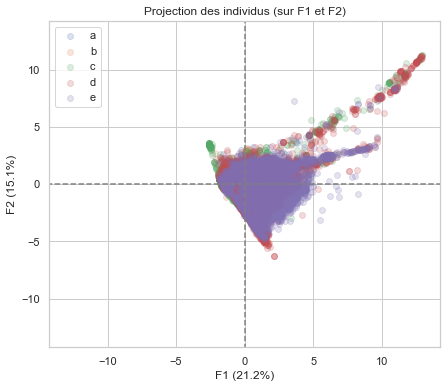

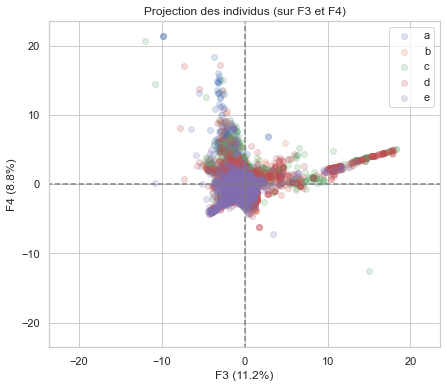

In [33]:
display_factorial_planes(X_projected, n_comp, acp, [(0,1),(2,3)],illustrative_var = nutri, alpha = 0.2)

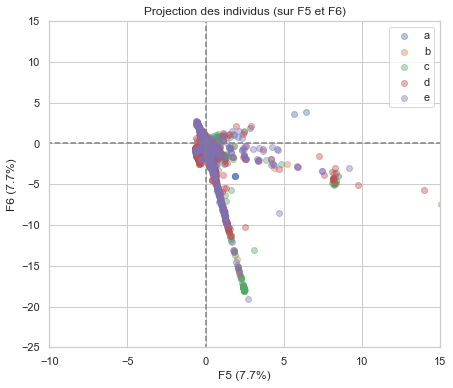

In [35]:
display_factorial_planes(X_projected, n_comp, acp, [(4,5)],illustrative_var = nutri,lims=[-10, 15,-25, 15], alpha = 0.4)

In [36]:
anova_nutri = smf.ols('energy_100g~nutrition_grade_fr', data=france_produit).fit()
print(anova_nutri.summary())

                            OLS Regression Results                            
Dep. Variable:            energy_100g   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     5994.
Date:                Mon, 21 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:52:21   Log-Likelihood:            -5.0725e+05
No. Observations:               64478   AIC:                         1.015e+06
Df Residuals:                   64473   BIC:                         1.015e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
anova_gras = smf.ols('energy_100g~pnns_groups_1', data=france_produit).fit()
print(anova_gras.summary())

In [ ]:
anova_gras = smf.ols('energy_100g~pnns_groups_1*nutrition_grade_fr', data=france_produit).fit()
print(anova_gras.summary())

In [54]:
fr_pr=france_produit[['code','nutrition_grade_fr','pnns_groups_1','energy_100g','sugars_100g']]
fr_pr.sample(4)

,code,nutrition_grade_fr,pnns_groups_1,energy_100g,sugars_100g
59101,7622210245328,d,Sugary snacks,1907.1785,32.0
52070,4032277007044,c,Composite foods,598.0000,1.3
24292,3263670434910,b,Fish Meat Eggs,580.0000,0.0
2016,20048242,a,Fruits and vegetables,137.0000,1.0
